# Question 1

Q 1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
nych = np.genfromtxt("data/nyc_housing.txt",delimiter=None)
Y = nych[:,-1]
X = nych[:,0:-1]
print(X.shape)

(300, 3)


Since we get (300, 3), we know that the number of features is 3, and the number of data values is 300.

Q 1.2

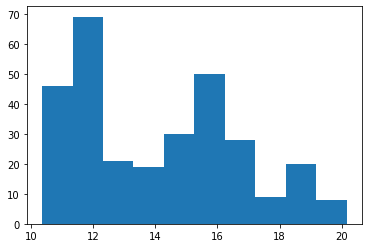

In [2]:
plt.hist(X[:,0])
plt.show()

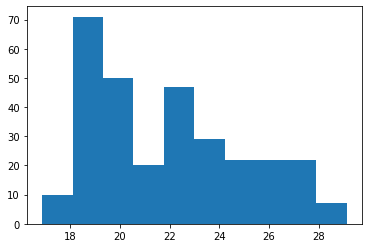

In [3]:
plt.hist(X[:,1])
plt.show()

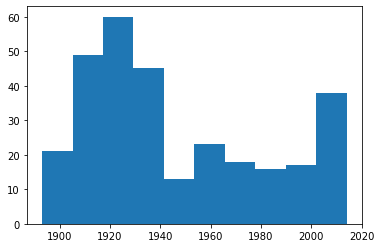

In [4]:
plt.hist(X[:,2])
plt.show()

Q 1.3

In [5]:
print(np.mean(X, axis=0))

[  14.11839244   21.90711618 1946.35333333]


In [6]:
print(np.std(X, axis=0))

[ 2.56909028  2.9785785  35.39889578]


Q 1.4

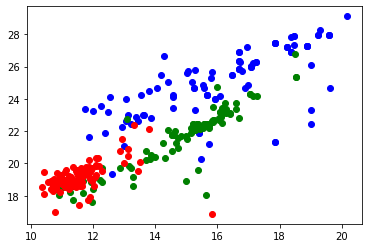

In [7]:
plt.scatter(X[Y==0, 0], X[Y==0, 1], c='b')
plt.scatter(X[Y==1, 0], X[Y==1, 1], c='g')
plt.scatter(X[Y==2, 0], X[Y==2, 1], c='r')
plt.show()

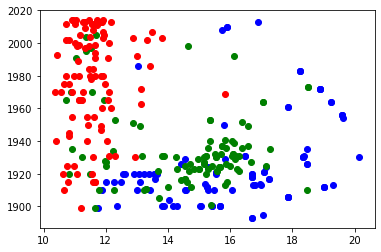

In [8]:
plt.scatter(X[Y==0, 0], X[Y==0, 2], c='b')
plt.scatter(X[Y==1, 0], X[Y==1, 2], c='g')
plt.scatter(X[Y==2, 0], X[Y==2, 2], c='r')
plt.show()

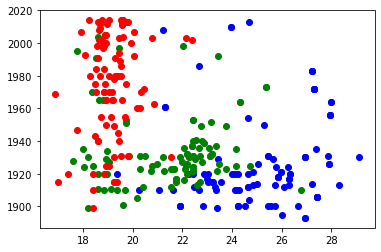

In [9]:
plt.scatter(X[Y==0, 1], X[Y==0, 2], c='b')
plt.scatter(X[Y==1, 1], X[Y==1, 2], c='g')
plt.scatter(X[Y==2, 1], X[Y==2, 2], c='r')
plt.show()

# Question 2

Q 2.1

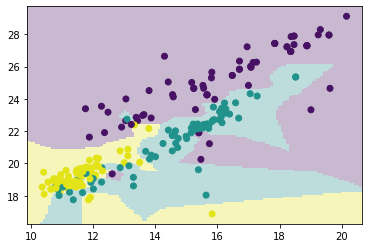

In [10]:
nych = np.genfromtxt("data/nyc_housing.txt",delimiter=None)
Y = nych[:,-1]
X = nych[:,0:-1]
import mltools as ml
np.random.seed(0)
X,Y = ml.shuffleData(X,Y)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75)
Xtr = Xtr[:,0:2]
Xva = Xva[:,0:2]
knn = ml.knn.knnClassify()

knn.train(Xtr, Ytr, 1)
vaHat = knn.predict(Xva)
ml.plotClassify2D( knn, Xtr, Ytr )

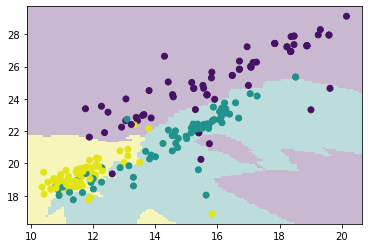

In [11]:
knn.train(Xtr, Ytr, 5)
vaHat = knn.predict(Xva)
ml.plotClassify2D( knn, Xtr, Ytr )

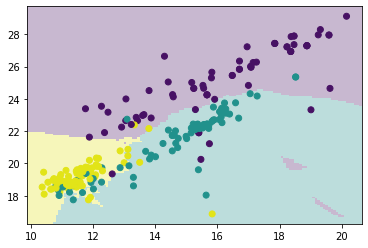

In [12]:
knn.train(Xtr, Ytr, 10)
vaHat = knn.predict(Xva)
ml.plotClassify2D( knn, Xtr, Ytr )

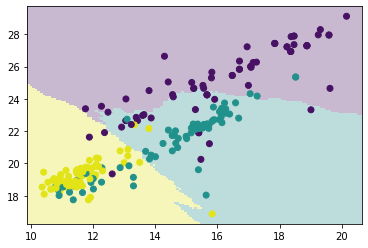

In [13]:
knn.train(Xtr, Ytr, 50)
vaHat = knn.predict(Xva)
ml.plotClassify2D( knn, Xtr, Ytr )

Q 2.2

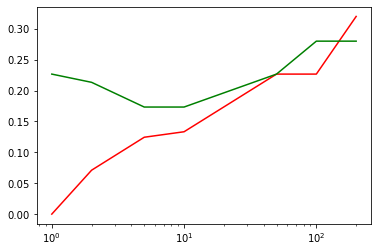

In [14]:
K = [1,2,5,10,50,100,200]
errTrain = [None]*len(K)
errValid = [None]*len(K)
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k)
    Yhat = learner.predict(Xtr)
    errTrain[i] = learner.err(Xtr, Ytr)
    Yhat = learner.predict(Xva)
    errValid[i] = learner.err(Xva, Yva)

plt.semilogx(K, errTrain, 'r')
plt.semilogx(K, errValid, 'g')
plt.show()

Based on the results, I would recommend k = 5 since the validation error is the lowest at k = 5.

Q 2.3

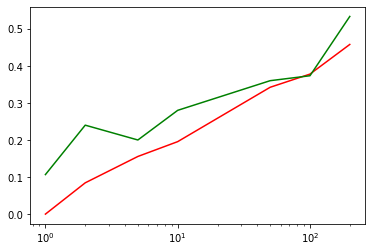

In [15]:
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75)
K = [1,2,5,10,50,100,200]
errTrain = [None]*len(K)
errValid = [None]*len(K)
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k)
    Yhat = learner.predict(Xtr)
    errTrain[i] = learner.err(Xtr, Ytr)
    Yhat = learner.predict(Xva)
    errValid[i] = learner.err(Xva, Yva)

plt.semilogx(K, errTrain, 'r')
plt.semilogx(K, errValid, 'g')
plt.show()

The plot different from the one above, and I will recommend k = 1 here since that is when the validation error is the lowest.

# Question 3

3.1

p(y) = 4/10

p(x1/y=1) = 3/4    

p(x2/y=1) = 0/4    

p(x3/y=1) = 3/4

p(x4/y=1) = 2/4    

p(x5/y=1) = 1/4   

p(x1/y=-1) = 3/6    

p(x2/y=-1) = 5/6    

p(x3/y=-1) = 4/6

p(x4/y=-1) = 5/6   

p(x5/y=-1) = 2/6   

3.2

(a)

p(x = (0 0 0 0 0)|y=1) = (1-3/4) * (1-0) * (1-3/4) * (1-2/4) * (1-1/4) * 4/10 = 0.0094

p(x = (0 0 0 0 0)|y=-1) = (1-3/6) * (1-5/6) * (1-4/6) * (1-5/6) * (1-2/6) * (1-4/10) = 0.0019

Since 0.0094 > 0.0019, we predict class y = 1 in this case.

(b)

p(x = (1 1 0 1 0)|y=1) = 3/4 * 0/4 * (1-3/4) * 2/4 * (1-1/4) * 4/10 = 0

p(x = (1 1 0 1 0)|y=-1) = 3/6 * 5/6 * (1-4/6)* 5/6 * (1-2/6) * (1-4/10) = 0.0463

Since 0 < 0.0463, we predict class y = -1 in this case.

3.3

p(y=1|x = (0 0 0 0 0)) =  p(x = (0 0 0 0 0)|y=1) / (p(x = (0 0 0 0 0)|y=1) + p(x = (0 0 0 0 0)|y=-1)) = 0.8351
    
p(y=1|x = (1 1 0 1 0)) =  p(x = (1 1 0 1 0)|y=1) / (p(x = (1 1 0 1 0)|y=1) + p(x = (1 1 0 1 0)|y=-1)) = 0

3.4

When we calculate the probability, "Joint" Bayes classifier will directly count the occurence while the Naive Bayes calculates conditional probabilites. Since our features here are in multiple dimensions, we want to use the conditional independencies assumed by naïve Bayes. Also, this assumption can avoid overfitting.

3.5

Since "we cannot tell whether the email author is known", we can treat all x_1 as 0. We can see clearly from the form that there are many cases that x_1 = 1, and their according y's have both 0 and 1. So we can say that our model cannot function the same as before and we need to retrain it.

# Question 4

Q 4.1

In [16]:
Xtr = Xtr[:,0:2]
Xva = Xva[:,0:2]
class0 = []
for i in range(len(Ytr)):
    if Ytr[i] == 0:
        class0.append(Xtr[i])
meanVector0 = np.mean(class0, axis=0) # mean vector for class y = 0
print(meanVector0)

class1 = []
for i in range(len(Ytr)):
    if Ytr[i] == 1:
        class1.append(Xtr[i])
meanVector1 = np.mean(class1, axis=0) # mean vector for class y = 1
print(meanVector1)

class2 = []
for i in range(len(Ytr)):
    if Ytr[i] == 2:
        class2.append(Xtr[i])
meanVector2 = np.mean(class2, axis=0) # mean vector for class y = 2
print(meanVector2)

[16.16072703 25.09873529]
[14.49622311 21.33757479]
[11.62077481 19.23708995]


In [17]:
covMatrix0 = np.cov(class0, rowvar=False) # convariance matrix for class y = 0
print(covMatrix0)

covMatrix1 = np.cov(class1, rowvar=False) # convariance matrix for class y = 1
print(covMatrix1)

covMatrix2 = np.cov(class2, rowvar=False) # convariance matrix for class y = 2
print(covMatrix2)

[[5.10048908 3.95895935]
 [3.95895935 4.75599524]]
[[3.66364855 3.36178359]
 [3.36178359 3.71261651]]
[[0.73901117 0.3035573 ]
 [0.3035573  0.70945946]]


Q 4.2

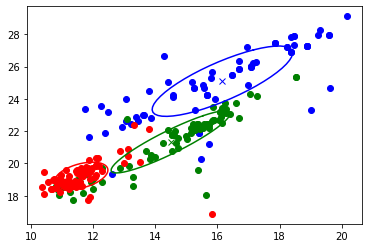

In [18]:
for x1,x2 in class0:
    plt.scatter(x1, x2, c='b')
    
for x1,x2 in class1:
    plt.scatter(x1, x2, c='g')
    
for x1,x2 in class2:
    plt.scatter(x1, x2, c='r')
    
ml.plotGauss2D(meanVector0, covMatrix0, color='b')
ml.plotGauss2D(meanVector1, covMatrix1, color='g')
ml.plotGauss2D(meanVector2, covMatrix2, color='r')

Q 4.3

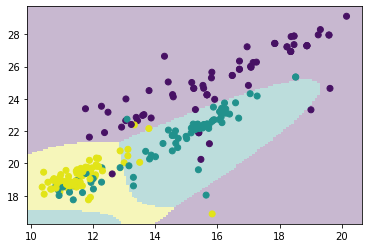

In [19]:
bc = ml.bayes.gaussClassify( Xtr, Ytr );
ml.plotClassify2D(bc, Xtr, Ytr);

In [20]:
print(bc.err(Xtr, Ytr)) # empirical error rate on the training data
print(bc.err(Xva, Yva)) # empirical error rate on the validation data

0.15555555555555556
0.13333333333333333


# Question 5

For this homework, I mainly rely on lecture and discussion materials. I also post a question on piazza and read questions post by other students on piazza (mainly about Question 2 and Question 4). I search online to find documents (for numpy and matplotlib), too. I did not collaborate with any other student for this assignment.